In [3]:
from PIL import Image
import numpy as np
import sys
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cbook
import cmocean
import matplotlib.colors as mcolors
import cmocean.plots
sys.path.append('..')
from telescope_simulator import TelescopeSimulator

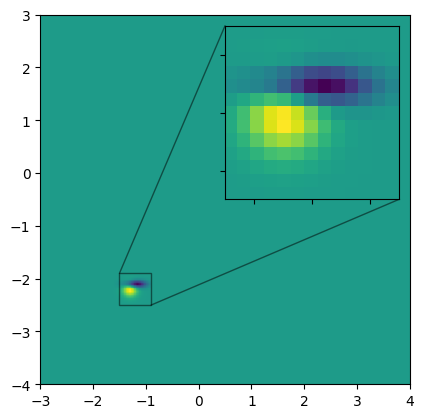

In [9]:
fig, ax = plt.subplots()

# make data
Z = np.load(cbook.get_sample_data("axes_grid/bivariate_normal.npy"))  # 15x15 array

Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z
extent = (-3, 4, -4, 3)

ax.imshow(Z2, extent=extent, origin="lower")

# inset axes....
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.imshow(Z2, extent=extent, origin="lower")

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

In [ ]:
input_image = r"./stars/img_paper/BHs.png"
im_array = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)
telescope_diameter_m = 6.5  # in meters
telescope_focal_length_m = 131.4  # in meters
wavelength = 2000e-9  # in meters
CCD_pixel_count = im_array.shape[0]  # The pixel width of your simulated CCD
show = True
pixel_size_input_image = 0.006
CCD_pixel_size =  pixel_size_input_image * telescope_focal_length_m / 206265 # in meters
telescope_simulator = TelescopeSimulator(im_array, telescope_diameter_m,telescope_focal_length_m,
    wavelength, pixel_size_input_image, CCD_pixel_size,CCD_pixel_count, show
)

output_img = telescope_simulator.generate_image()
# import datetime
# now = datetime.datetime.time()
cv2.imwrite(f'stars/conv_test_{pixel_size_input_image}.png', output_img)